# ME5413 Homework 3: Planning

## Task 0: Load the Map

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

Occupied Cells: 823039
Free Cells: 176961


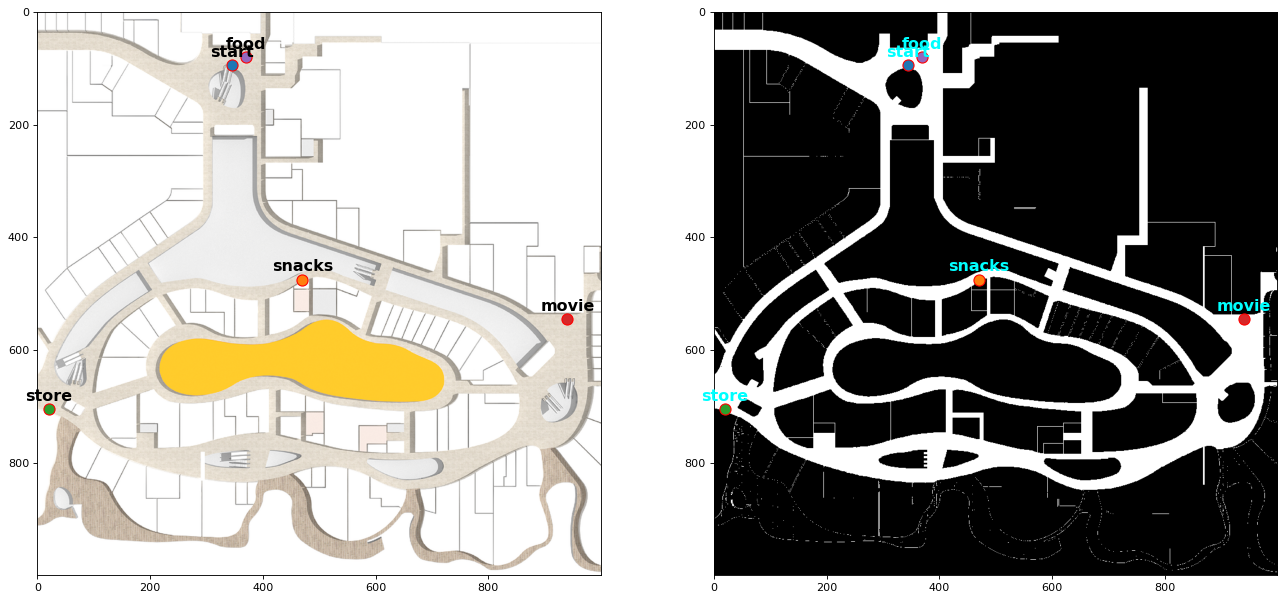

Cell start is free: True
Cell snacks is free: True
Cell store is free: True
Cell movie is free: True
Cell food is free: True


In [2]:
# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()
#test
# grid_map = np.array([[255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
#  [  0, 255,   0, 255, 255, 255, 255, 255,   0, 255],
#  [255, 255,   0, 255, 255, 255, 255, 255, 255, 255],
#  [  0,   0,   0,   0, 255, 255, 255, 255, 255,   0],
#  [255, 255, 255, 255,   0,   0, 255, 255, 255, 255],
#  [255, 255, 255,   0, 255, 255, 255, 255, 255, 255],
#  [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
#  [  0, 255, 255,   0, 255, 255,   0,   0, 255, 255],
#  [  0, 255, 255,   0, 255, 255, 255, 255, 255, 255],
#  [  0, 255, 255, 255, 255, 255, 255, 255, 255, 255]])



# print("Size of the map:", grid_map.shape)
print("Occupied Cells:", np.count_nonzero(grid_map == 0))
print("Free Cells:", np.count_nonzero(grid_map == 255))

# Map resolution (Constant)
MAP_RES = 0.2 # each cell represents a 0.2m x 0.2m square in reality

# Locations on the map
locations = {'start':  [345, 95],    # Start from the level 2 Escalator
             'snacks': [470, 475],   # Garrett Popcorn
             'store':  [20, 705],    # DJI Store
             'movie':  [940, 545],   # Golden Village
             'food':   [535, 800],   # PUTIEN
            }
# locations = {'start':  [0, 0],    # Start from the level 2 Escalator
#              'snacks': [9, 9],   # Garrett Popcorn
#             }

# A helper function to mark the locations on the map
def plot_locations(locations: dict, color: 'str'='black'):
    for key, value in locations.items():
        plt.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
        plt.text(locations[key][0], locations[key][1]-15, s=key, fontsize='x-large', fontweight='bold', c=color, ha='center')
    return

# Plot the locaitons on the map 
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1,2,1)
plt.imshow(floor_plan)
plot_locations(locations)
plt.subplot(1,2,2)
plt.imshow(grid_map_img, cmap='gray')
plot_locations(locations, color='cyan')
plt.show()

# Check if the designated locations are free
for key, value in locations.items():
    print(f"Cell {key} is free: {grid_map[value[0], value[1]] == 255}")

## Task 1

Planned Path: [(20, 705), (20, 704), (20, 703), (20, 702), (20, 701), (20, 700), (20, 699), (20, 698), (20, 697), (20, 696), (20, 695), (20, 694), (20, 693), (20, 692), (20, 691), (20, 690), (20, 689), (20, 688), (20, 687), (20, 686), (20, 685), (20, 684), (20, 683), (20, 682), (20, 681), (20, 680), (20, 679), (20, 678), (20, 677), (20, 676), (20, 675), (20, 674), (20, 673), (20, 672), (20, 671), (20, 670), (20, 669), (20, 668), (20, 667), (20, 666), (20, 665), (20, 664), (20, 663), (20, 662), (20, 661), (20, 660), (20, 659), (20, 658), (20, 657), (20, 656), (20, 655), (20, 654), (20, 653), (20, 652), (20, 651), (20, 650), (20, 649), (20, 648), (20, 647), (20, 646), (20, 645), (20, 644), (20, 643), (20, 642), (20, 641), (20, 640), (20, 639), (20, 638), (20, 637), (20, 636), (20, 635), (20, 634), (20, 633), (20, 632), (20, 631), (20, 630), (20, 629), (20, 628), (20, 627), (20, 626), (20, 625), (20, 624), (20, 623), (20, 622), (20, 621), (20, 620), (20, 619), (20, 618), (20, 617), (20, 6

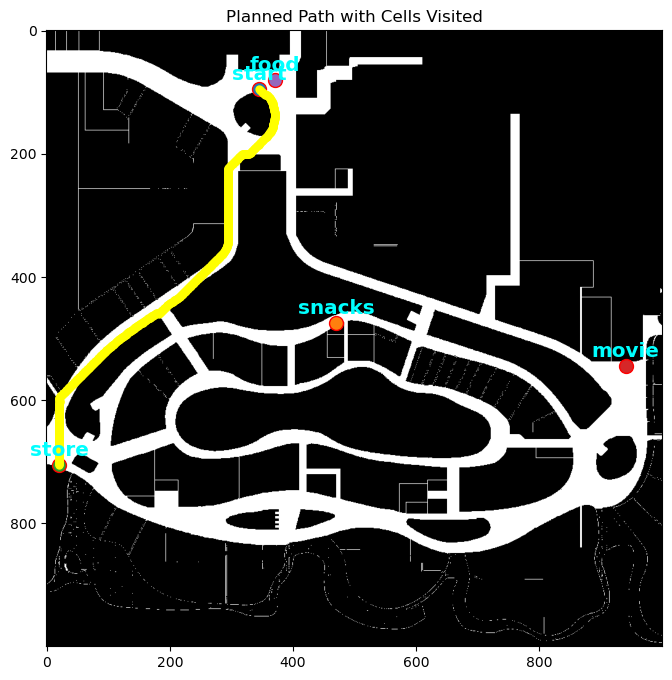

In [3]:
import time
# Implementing A* algorithm
def heuristic_cost_estimate(start, goal):
    return np.sqrt((start[0] - goal[0]) ** 2 + (start[1] - goal[1]) ** 2) * MAP_RES

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path

def a_star(start, goal):
    open_set = {start}
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic_cost_estimate(start, goal)}

    while open_set:
        current = min(open_set, key=lambda x: f_score[x])
        if current == goal:
            return reconstruct_path(came_from, goal), g_score[goal]

        open_set.remove(current)
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue

                neighbor = (current[0] + dx, current[1] + dy)
                if not (0 <= neighbor[0] < grid_map.shape[0] and 0 <= neighbor[1] < grid_map.shape[1]):
                    continue

                if grid_map[neighbor[0], neighbor[1]] != 255:
                    continue

                tentative_g_score = g_score[current] + MAP_RES
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic_cost_estimate(neighbor, goal)
                    if neighbor not in open_set:
                        open_set.add(neighbor)

    return None, float('inf')

# Finding path from start to store
start_time = time.time()
path, total_distance = a_star(tuple(locations['start']), tuple(locations['store']))
end_time = time.time()
print("Planned Path:", path)
print("Total Travelled Distance:", total_distance * MAP_RES, "m")
print("Total Run Time:", end_time - start_time, "seconds")

# Visualize the planned path and cells visited
plt.figure(figsize=(8, 8))
plt.imshow(grid_map_img, cmap='gray')
plot_locations(locations, color='cyan')
if path:
    path_x, path_y = zip(*path)
    plt.plot(path_x, path_y, marker='o', color='yellow', markersize=5, linestyle='-')
plt.title('Planned Path with Cells Visited')
plt.show()

## Task 2